## Analysis 3 - Stability Trend among countries due to US actions

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from pandas.tools import plotting
import seaborn as sns
import matplotlib.pyplot as plt
import os.path
import glob
import zipfile
import operator
%matplotlib inline

In [2]:
# Read the same pickle file as analysis1
data_dir = '../data/'
pickle_path =  data_dir +'pickled/analysis1/gdelt.pickle'
df = pd.read_pickle(pickle_path)
print(df.columns)

Index(['SQLDATE', 'MonthYear', 'Year', 'FractionDate', 'Actor1Code',
       'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode',
       'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code',
       'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code',
       'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
       'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
       'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent',
       'EventCode', 'EventBaseCode', 'EventRootCode', 'QuadClass',
       'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'AvgTone',
       'Actor1Geo_Type', 'Actor1Geo_FullName', 'Actor1Geo_CountryCode',
       'Actor1Geo_ADM1Code', 'Actor1Geo_Lat', 'Actor1Geo_Long',
       'Actor1Geo_FeatureID', 'Actor2Geo_Type', 'Actor2Geo_FullName',
       'Actor2Geo_CountryCode', 'Actor2Geo_ADM1Code', 'Actor2Geo_Lat',
       'Actor2Geo_Long', 'Actor2Geo_FeatureID', 'ActionGeo_Type',
      

In [3]:
df = df.reset_index()
df = df[['SQLDATE','ActionGeo_CountryCode','Actor1Geo_CountryCode','Actor1Code', 'Actor1Name','Actor1Type1Code',  'Actor1EthnicCode', 'Actor1Religion1Code','Actor2Geo_CountryCode','Actor2Code', 'Actor2Name', 'Actor2Type1Code', 'Actor2EthnicCode', 'Actor2Religion1Code','AvgTone','NumArticles','GoldsteinScale','QuadClass','EventRootCode','IsRootEvent', 'MonthYear', 'Year']]

#### Convert the required columns to numeric types


In [4]:
df[['AvgTone','NumArticles', 'GoldsteinScale', 'IsRootEvent', 'QuadClass', 'Year', 'MonthYear']] = df[['AvgTone','NumArticles', 'GoldsteinScale', 'IsRootEvent', 'QuadClass', 'Year', 'MonthYear']].apply(pd.to_numeric)

In [5]:
def findOtherCountry(row):
    US_code = set(['US', 'USA'])
    other_code = set(row[['ActionGeo_CountryCode', 'Actor2Geo_CountryCode', 'Actor2Geo_CountryCode']].dropna().values)
    other_code = other_code.difference(US_code)
    other_code = list(other_code)
    if other_code:
        return other_code[0]
    else:
        return np.nan



In [6]:
df['OtherCountry'] = df.apply(lambda x:findOtherCountry(x),axis=1)
df.head()

,SQLDATE,ActionGeo_CountryCode,Actor1Geo_CountryCode,Actor1Code,Actor1Name,Actor1Type1Code,Actor1EthnicCode,Actor1Religion1Code,Actor2Geo_CountryCode,Actor2Code,...,Actor2Religion1Code,AvgTone,NumArticles,GoldsteinScale,QuadClass,EventRootCode,IsRootEvent,MonthYear,Year,OtherCountry
0,20170101,US,NaN,NaN,NaN,NaN,NaN,NaN,CA,CAN,...,NaN,-2.799552,1,4.0,1,03,0,201701,2017,CA
1,20170101,US,NaN,NaN,NaN,NaN,NaN,NaN,CA,USA,...,NaN,-5.400458,8,-9.0,4,18,0,201701,2017,CA
2,20170101,US,NaN,NaN,NaN,NaN,NaN,NaN,CA,USA,...,NaN,-5.400458,8,-10.0,4,19,0,201701,2017,CA
3,20170101,US,CA,CAN,CANADA,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.603065,3,0.0,1,01,1,201701,2017,NaN
4,20170101,US,CA,CAN,CANADA,NaN,NaN,NaN,NaN,NaN,...,NaN,-2.793463,31,4.0,1,03,0,201701,2017,NaN


In [7]:
df['SQLDATE'] = pd.to_datetime(df['SQLDATE'],infer_datetime_format=True)

#### Handle categorical variables

In [8]:
df['QuadClass_Cat'] = df['QuadClass'].astype("category", categories=[1,2,3,4], ordered=False)
df.describe()

/Users/tanya/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,AvgTone,NumArticles,GoldsteinScale,QuadClass,IsRootEvent,MonthYear,Year
count,377348.000000,377348.000000,377330.000000,377348.000000,377348.000000,377348.000000,377348.000000
mean,-1.519271,8.740476,1.006107,1.675170,0.544137,201700.722248,2016.985144
std,3.157814,47.496627,4.328482,1.062037,0.498049,18.389454,0.184914
min,-23.545531,1.000000,-10.000000,1.000000,0.000000,200701.000000,2007.000000
25%,-3.405548,2.000000,NaN,1.000000,0.000000,201701.000000,2017.000000
50%,-1.437372,2.000000,NaN,1.000000,1.000000,201702.000000,2017.000000
75%,0.501253,5.000000,NaN,2.000000,1.000000,201703.000000,2017.000000
max,17.894737,6948.000000,10.000000,4.000000,1.000000,201704.000000,2017.000000


#### Filter out rows other than for Year 2017

In [9]:
df = df[df['Year'] == 2017]

In [10]:
df['GoldsteinScale'].count()

372462

In [11]:
df = df[df['Actor1Geo_CountryCode'] == 'US']

In [12]:
df['GoldsteinScale'].count()

176526

In [13]:
df.head()

,SQLDATE,ActionGeo_CountryCode,Actor1Geo_CountryCode,Actor1Code,Actor1Name,Actor1Type1Code,Actor1EthnicCode,Actor1Religion1Code,Actor2Geo_CountryCode,Actor2Code,...,AvgTone,NumArticles,GoldsteinScale,QuadClass,EventRootCode,IsRootEvent,MonthYear,Year,OtherCountry,QuadClass_Cat
8,2017-01-01,UK,US,CHN,CHINA,NaN,NaN,NaN,UK,USAAGR,...,1.170399,24,3.4,1,05,1,201701,2017,UK,1
9,2017-01-01,US,US,GBR,UNITED KINGDOM,NaN,NaN,NaN,UK,COP,...,-10.861423,2,-5.0,4,17,1,201701,2017,UK,4
16,2017-01-01,FR,US,USA,UNITED STATES,NaN,NaN,NaN,CH,CHN,...,-2.248394,3,4.0,1,03,0,201701,2017,CH,1
17,2017-01-01,UK,US,USA,UNITED STATES,NaN,NaN,NaN,UK,GBR,...,-10.861423,2,-9.5,4,18,0,201701,2017,UK,4
18,2017-01-01,MX,US,USA,KANSAS,NaN,NaN,NaN,MX,MEX,...,-7.586260,14,-2.0,3,11,1,201701,2017,MX,3


In [14]:
table = pd.pivot_table(df, values='GoldsteinScale', index='SQLDATE', columns=['OtherCountry'], aggfunc=np.mean)

In [17]:
table = table[['IN','MX','CH','UK','CA']]
table.head()

OtherCountry,IN,MX,CH,UK,CA
SQLDATE,,,,,
2017-01-01,0.944000,0.886275,1.248148,0.394949,1.616250
2017-01-02,0.625455,0.775000,1.593750,0.983439,1.785827
2017-01-03,0.262295,1.444751,1.022442,0.921708,2.002890
2017-01-04,1.064151,1.476724,0.999248,1.151373,2.189904
2017-01-05,0.954839,0.172314,1.001045,1.109160,1.935377


In [19]:
table.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-04-08', '2017-04-09', '2017-04-10', '2017-04-11',
               '2017-04-12', '2017-04-13', '2017-04-14', '2017-04-15',
               '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='SQLDATE', length=107, freq=None)

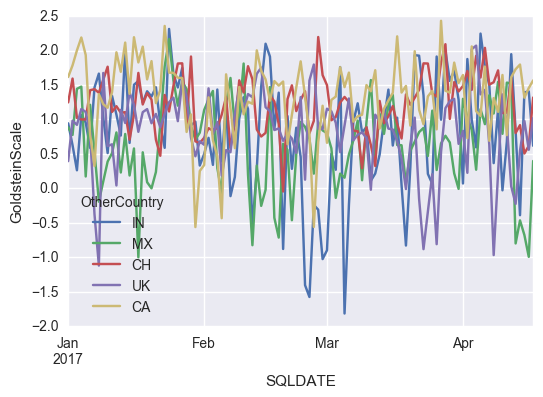

In [24]:
table.plot()
plt.ylabel('GoldsteinScale')
plt.savefig('analysis3/RegionalStability.png')

### Conclusion - So far in the year 2017 US actions have caused both positive and negative impact to the stability of the above countries - India, Mexico, China, UK & Canada. Indian stability trend seems to be the most volatile due to US actions, while Canada seems to enjoy mostly stability enhancing US actions.